In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
import electrostatic

# 2D Lattice Networks

In [2]:
# Parameter and Inti
N_x, N_y, N_z       = 3,3,1
electrode_pos       = [[0,0,0],[N_x-1,0,0],[0,N_y-1,0],[N_x-1,N_y-1,0]]
electrode_type      = ['constant']*4
radius, radius_std  = 10.0, 0.0
eps_r, eps_s        = 2.6, 3.9
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
lattice.position_planar()
print(lattice)

Topology Class with 9 particles, 5 junctions.
Network Topology:
[[   1    1    3 -100 -100 -100]
 [-100    0    2    4 -100 -100]
 [   2    1    5 -100 -100 -100]
 [-100    0    4    6 -100 -100]
 [-100    1    3    5    7 -100]
 [-100    2    4    8 -100 -100]
 [   3    3    7 -100 -100 -100]
 [-100    4    6    8 -100 -100]
 [   4    5    7 -100 -100 -100]]


In [3]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()
d_mat   = lattice.return_dist_matrix()
d_e_mat = lattice.return_electrode_dist_matrix()

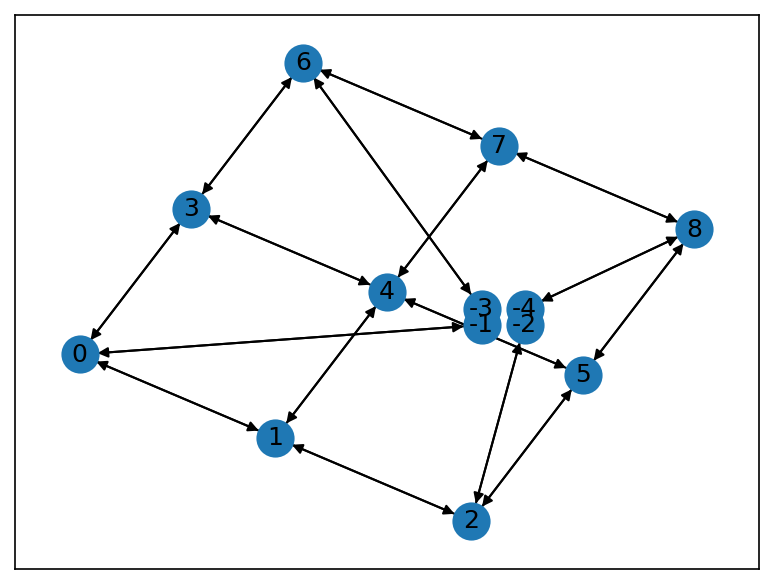

In [4]:
fig, ax = plt.subplots(dpi=150)
nx.draw_networkx(G=G, pos=pos, ax=ax)

In [5]:
d_mat

array([[ 0.        , 21.00000023, 42.00000043, 21.00000023, 29.6971511 ,
        46.95502134, 41.99999943, 46.95990687, 59.39975329],
       [21.00000023,  0.        , 21.00000023, 29.69981907, 21.0000002 ,
        29.69601385, 46.95494719, 41.99999937, 46.95846855],
       [42.00000043, 21.00000023,  0.        , 46.95983452, 29.70095618,
        21.00000023, 59.39418562, 46.95638562, 41.99999943],
       [21.00000023, 29.69981907, 46.95983452,  0.        , 21.0000002 ,
        42.00000038, 21.00000023, 29.70373961, 46.96335551],
       [29.6971511 , 21.0000002 , 29.70095618, 21.0000002 ,  0.        ,
        21.0000002 , 29.6932297 , 21.0000002 , 29.70260269],
       [46.95502134, 29.69601385, 21.00000023, 42.00000038, 21.0000002 ,
         0.        , 46.95149973, 29.69436697, 21.00000023],
       [41.99999943, 46.95494719, 59.39418562, 21.00000023, 29.6932297 ,
        46.95149973,  0.        , 21.00000023, 42.00000043],
       [46.95990687, 41.99999937, 46.95638562, 29.70373961, 21